In [1]:
import pandas as pd
import geopandas as gd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import rasterio
import rasterio.warp
from rasterio import features
import shapely.geometry
import shapely
import seaborn as sn

In [2]:
os.chdir('/projects/canis/eoc_feature_corr')

In [3]:
grid_path = "./data/by_state/OR/or_extent_coverage.shp"
grid = gd.read_file(grid_path)
grid = grid.set_index('id')

In [4]:
feature_path = './data/cover/landforms_10classes_30m_dd83_3857.tiff'

feature_file = rasterio.open(feature_path)
feature_raster = feature_file.read(1)

In [5]:
grid['centroid'] = grid['geometry'].centroid
grid = grid.set_geometry('centroid')
grid['feature'] = grid['centroid'].map(lambda coords: next(feature_file.sample(coords.coords, indexes=1))[0])
grid = grid.set_geometry('geometry')
grid = grid.drop('centroid', axis=1)
grid

,left,top,right,bottom,med_rxpwr,chg_covera,verizon_co,geometry,feature
id,,,,,,,,,
130.0,-1.370092e+07,5.619686e+06,-1.369992e+07,5.618686e+06,-115.975,0,1,"POLYGON ((-13700919.062 5619685.577, -13699919...",3
131.0,-1.370092e+07,5.618686e+06,-1.369992e+07,5.617686e+06,-106.430,1,1,"POLYGON ((-13700919.062 5618685.577, -13699919...",3
1010.0,-1.369892e+07,5.615686e+06,-1.369792e+07,5.614686e+06,-99.715,1,1,"POLYGON ((-13698919.062 5615685.577, -13697919...",3
1011.0,-1.369892e+07,5.614686e+06,-1.369792e+07,5.613686e+06,-104.800,1,1,"POLYGON ((-13698919.062 5614685.577, -13697919...",3
1012.0,-1.369892e+07,5.613686e+06,-1.369792e+07,5.612686e+06,-96.780,1,1,"POLYGON ((-13698919.062 5613685.577, -13697919...",3
...,...,...,...,...,...,...,...,...,...
298996.0,-1.301892e+07,5.469686e+06,-1.301792e+07,5.468686e+06,-87.690,1,1,"POLYGON ((-13018919.062 5469685.577, -13017919...",1
298997.0,-1.301892e+07,5.468686e+06,-1.301792e+07,5.467686e+06,-96.680,1,1,"POLYGON ((-13018919.062 5468685.577, -13017919...",1
298998.0,-1.301892e+07,5.467686e+06,-1.301792e+07,5.466686e+06,-83.085,1,1,"POLYGON ((-13018919.062 5467685.577, -13017919...",1


In [6]:
grid['agreement'] = grid['chg_covera'] == grid['verizon_co']

In [7]:
sn.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [8]:
confusion_matrix = pd.crosstab( grid['feature'],grid['agreement'], rownames=['Form Type'], colnames=['Agreement'], normalize='index')
print (confusion_matrix)

Agreement     False     True 
Form Type                    
1          0.281513  0.718487
2          0.357143  0.642857
3          0.486759  0.513241
4          0.476923  0.523077
6          0.638298  0.361702
7          0.707182  0.292818
8          0.718750  0.281250
9          0.500000  0.500000
10         0.629108  0.370892


In [9]:
confusion_matrix['Total'] = grid.groupby('feature').count()['agreement']

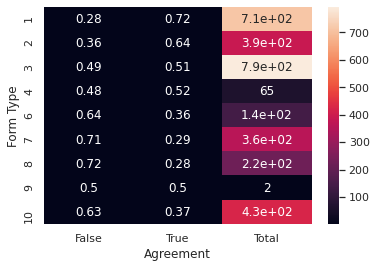

In [10]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()

Agreement   False  True   All
Cover Type                   
1             201   513   714
2             140   252   392
3             386   407   793
4              31    34    65
6              90    51   141
7             256   106   362
8             161    63   224
9               1     1     2
10            268   158   426
All          1534  1585  3119


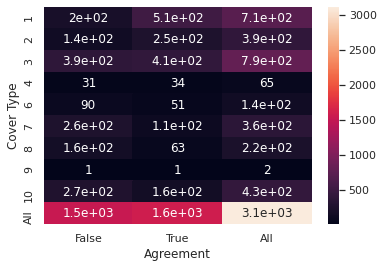

In [11]:
confusion_matrix = pd.crosstab( grid['feature'],grid['agreement'], rownames=['Cover Type'], colnames=['Agreement'], margins=True)
print (confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
plt.show()